In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/processed/re.csv")
df.head()

,RE,Site,SeqName,CutPos
0,BmtI,GCTAGC,MK968879.1 Homo sapiens isolate YHL_TK036_F4b1...,4588
1,NmeA6CIII,GCCGAC,MK968879.1 Homo sapiens isolate YHL_TK036_F4b1...,5940
2,RceI,CATCGAC,MK968879.1 Homo sapiens isolate YHL_TK036_F4b1...,14830
3,Eco47III,AGCGCT,MK968879.1 Homo sapiens isolate YHL_TK036_F4b1...,4535
4,NgoMIV,GCCGGC,MK968879.1 Homo sapiens isolate YHL_TK036_F4b1...,935


In [8]:
df_counts = df.RE.value_counts().reset_index()
df_counts.columns = ["RE", "CuttedSeqs"]
df_counts.head()

,RE,CuttedSeqs
0,BspDI,56384
1,BseCI,56384
2,Bsa29I,56384
3,Bsu15I,56384
4,BshVI,56384


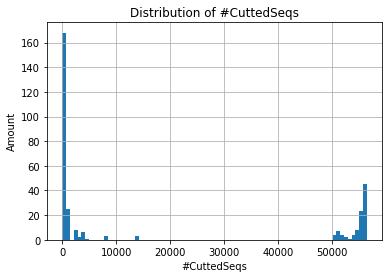

In [12]:
df_counts.hist(bins=80)
plt.title("Distribution of #CuttedSeqs")
plt.xlabel("#CuttedSeqs")
plt.ylabel("Amount")
plt.show()

We can see that many RE cut more than 50000 genomes

In [25]:
# sample best RE
freq_re = df_counts[df_counts.CuttedSeqs > 56100].RE.values
freq_re.shape

(22,)

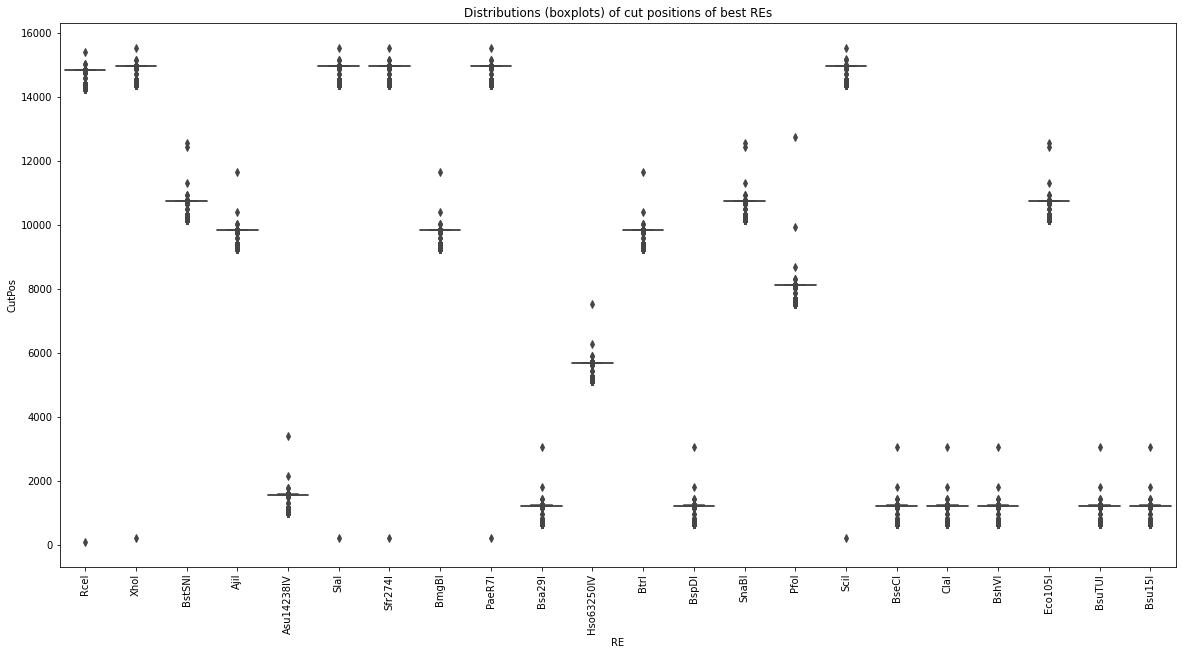

In [29]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="RE", y="CutPos", data=df[df.RE.isin(freq_re)])
plt.xticks(rotation=90)
plt.title("Distributions (boxplots) of cut positions of best REs")
plt.savefig("../figures/cut_position.png", dpi=200)
plt.show()

This distributions are very tight, but there are some outlayers, that could be formed by huge deletions in genomes